# Exemplo: Análise do IDEB

Neste notebook, vamos analisar dados relativos ao IDEB calculado por município no Brasil. Os dados estão no arquivo

In [51]:
arquivo = "IDEB por Município Rede Federal Séries Finais (5ª a 8ª).xml"

obtido no site <a href="http://dados.gov.br">dados.gov.br</a>

Como nosso arquivo é um .xml, vamos usar o módulo xml.etree.ElementTree para parsear o conteúdo do arquivo. Vamos abreviar o nome desse módulo por ET.

In [52]:
import xml.etree.ElementTree as ET

### O módulo ElementTree (ET)

Um arquivo XML é um conjunto hierárquico de dados, e portanto a maneira mais natural de representar esses dados é através de uma árvore. Para isso, o módulo ET tem duas classes: a classe ElementTree representa o documento XML inteiro como uma árvore, e a classe Element representa um nó desta árvore. Todas as interações que ocorrem com o documento completo (por exemplo, leitura e escrita no arquivo) são feitas através da classe ElementTree; por outro lado, as interações com um elemento isolado do XML e seus subelementos são feitas através da classe Element.

O método ET.parse retorna uma ElementTree.

In [53]:
tree = ET.parse(arquivo)

Para vermos o elemento raiz da árvore, usamos

In [54]:
root = tree.getroot()

O objeto root, que é um Element, tem as propriedades *tag* e *attrib*, que é um dicionário de seus atributos.

In [55]:
root.tag

'result'

In [56]:
root.attrib

{}

Para acessarmos cada um dos nós do elemento raiz, iteramos nestes nós (que são, também, Elements):

In [57]:
for child in root:
    print(child.tag, child.attrib)

url {}
id {}
nome {}
nome_estendido {}
descricao {}
inicio {}
final {}
formatacao {}
data_atualizacao {}
aditividade {}
url_origem {}
tempo_aditividade {}
portal_dados_abertos {}
disponibilizacao {}
estado {}
fonte_gestora {}
fonte_provedora {}
grupo_informacao {}
base_territorial {}
periodicidade {}
multiplicador {}
produto {}
publicacao {}
unidade_medida {}
orgao_primeiro_escalao {}
valores {}


### Selecionando os dados

Agora que temos uma ideia melhor dos dados a serem tratados, vamos construir um DataFrame do pandas com o que nos interessa. Primeiramente, observamos que somente o último nó nos interessa, já que todos os outros compõem o cabeçalho do arquivo XML. Assim, vamos explorar o nó *valores*:

In [58]:
valoresIDEB = root.find('valores')

Observe que temos mais uma camada de dados:

In [59]:
valoresIDEB

<Element 'valores' at 0x7f66cce61958>

In [60]:
valoresIDEB[0]

<Element 'entry' at 0x7f66cce619a8>

Assim, podemos por exemplo explorar os nós *netos* da árvore:

In [61]:
for child in valoresIDEB:
    for grandchild in child:
        print(grandchild.tag, grandchild.attrib)

valor {}
municipio_ibge {}
ano {}
valor {}
municipio_ibge {}
ano {}
valor {}
municipio_ibge {}
ano {}
valor {}
municipio_ibge {}
ano {}
valor {}
municipio_ibge {}
ano {}
valor {}
municipio_ibge {}
ano {}
valor {}
municipio_ibge {}
ano {}
valor {}
municipio_ibge {}
ano {}
valor {}
municipio_ibge {}
ano {}
valor {}
municipio_ibge {}
ano {}
valor {}
municipio_ibge {}
ano {}
valor {}
municipio_ibge {}
ano {}
valor {}
municipio_ibge {}
ano {}
valor {}
municipio_ibge {}
ano {}
valor {}
municipio_ibge {}
ano {}
valor {}
municipio_ibge {}
ano {}
valor {}
municipio_ibge {}
ano {}
valor {}
municipio_ibge {}
ano {}
valor {}
municipio_ibge {}
ano {}
valor {}
municipio_ibge {}
ano {}
valor {}
municipio_ibge {}
ano {}
valor {}
municipio_ibge {}
ano {}
valor {}
municipio_ibge {}
ano {}
valor {}
municipio_ibge {}
ano {}
valor {}
municipio_ibge {}
ano {}
valor {}
municipio_ibge {}
ano {}
valor {}
municipio_ibge {}
ano {}
valor {}
municipio_ibge {}
ano {}
valor {}
municipio_ibge {}
ano {}
valor {}
munic

Vamos transformar agora os dados em um DataFrame.

In [62]:
data = []
for child in valoresIDEB:
    data.append([float(child[0].text), child[1].text, child[2].text])

In [63]:
data

[[4.7, '120040', '2009'],
 [6.0, '130260', '2009'],
 [5.9, '140010', '2009'],
 [5.5, '150140', '2009'],
 [4.0, '211130', '2009'],
 [6.3, '220190', '2009'],
 [6.9, '230440', '2009'],
 [7.1, '261160', '2009'],
 [6.5, '280670', '2009'],
 [7.1, '292740', '2009'],
 [6.0, '310620', '2009'],
 [6.3, '313670', '2009'],
 [6.4, '317020', '2009'],
 [5.7, '330455', '2009'],
 [6.9, '410690', '2009'],
 [5.7, '420540', '2009'],
 [5.8, '431490', '2009'],
 [7.3, '431690', '2009'],
 [7.1, '500270', '2009'],
 [5.3, '520870', '2009'],
 [4.4, '120040', '2007'],
 [5.3, '140010', '2007'],
 [5.2, '150140', '2007'],
 [3.4, '211130', '2007'],
 [4.3, '220190', '2007'],
 [6.8, '230440', '2007'],
 [7.5, '261160', '2007'],
 [5.4, '280670', '2007'],
 [7.2, '292740', '2007'],
 [5.5, '310620', '2007'],
 [7.0, '313670', '2007'],
 [6.0, '317020', '2007'],
 [6.1, '330455', '2007'],
 [5.8, '420540', '2007'],
 [6.2, '431490', '2007'],
 [6.5, '431690', '2007'],
 [6.5, '500270', '2007'],
 [5.5, '520870', '2007'],
 [6.7, '5300

Como a biblioteca <a href="http://pandas.pydata.org/">Pandas</a> está na moda ;) vamos utilizá-la para tratar e armazenar os dados. Mas vamos chamar a biblioteca pandas com um nome mais curto, pd.

In [64]:
import pandas as pd

Inicialmente, criamos um DataFrame, ou seja, uma tabela, com os dados que já temos.

In [65]:
tabelaInicial = pd.DataFrame(data, columns = ["Valor", "Municipio", "Ano"])

In [66]:
tabelaInicial

,Valor,Municipio,Ano
0,4.7,120040,2009
1,6.0,130260,2009
2,5.9,140010,2009
3,5.5,150140,2009
4,4.0,211130,2009
5,6.3,220190,2009
6,6.9,230440,2009
7,7.1,261160,2009
8,6.5,280670,2009
9,7.1,292740,2009


Observe que nesta tabela temos dados de 2007 e 2009. Não vamos usar os dados relativos a 2007 por simplicidade.

In [67]:
tabelaInicial = tabelaInicial.loc[0:19]

### Obtendo códigos IBGE para os municípios

Na tabelaInicial, os municípios não estão identificados por nome, e sim pelo seu código IBGE. Para lermos o arquivo excel em que temos a tabela dos municípios brasileiros (atualizada em 2014) e seus respectivos códigos de 7 dígitos - os códigos incluem um dígito verificador ao final - usamos o módulo xlrd, que não estará instalado junto com o pandas por definição (você deve instalá-lo manualmente) se quiser executar o comando abaixo. Veja <a href="https://pypi.python.org/pypi/xlrd">aqui</a>, por exemplo.

In [68]:
dadosMunicipioIBGE = pd.read_excel("DTB_2014_Municipio.xls")

Podemos olhar o tipo de tabela que temos usando o método *head* do pandas.

In [69]:
dadosMunicipioIBGE.head()

,UF,Nome_UF,Mesorregião Geográfica,Nome_Mesorregião,Microrregião Geográfica,Nome_Microrregião,Município,Cod Municipio Completo,Nome_Município
0,11,Rondônia,2,Leste Rondoniense,6,Cacoal,15,1100015,Alta Floresta D'Oeste
1,11,Rondônia,2,Leste Rondoniense,3,Ariquemes,23,1100023,Ariquemes
2,11,Rondônia,2,Leste Rondoniense,8,Colorado do Oeste,31,1100031,Cabixi
3,11,Rondônia,2,Leste Rondoniense,6,Cacoal,49,1100049,Cacoal
4,11,Rondônia,2,Leste Rondoniense,8,Colorado do Oeste,56,1100056,Cerejeiras


Como não são todos os dados que nos interessam, vamos selecionar apenas as colunas "Nome_UF" (pois pode ser interessante referenciarmos o estado da federação mais tarde), "Cod Municipio Completo" e "Nome_Município".

In [70]:
dadosMunicipioIBGE = dadosMunicipioIBGE[["Nome_UF", "Cod Municipio Completo", "Nome_Município"]]

Em seguida, precisamos selecionar na tabela completa dadosMunicipioIBGE os dados dos municípios presentes na tabelaInicial contendo os valores calculados do IDEB. Para isso, vamos extrair dos dois DataFrames as colunas correspondentes aos codigos de município (lembrando que nos dadosMunicipioIBGE os códigos contém um dígito verificador que não será utilizado):

In [71]:
listaMunicipiosInicial = tabelaInicial["Municipio"]
listaMunicipios = dadosMunicipioIBGE["Cod Municipio Completo"].map(lambda x: str(x)[0:6])

Observe que usamos acima o método map para transformar os dados numéricos em string, e depois extrair o último dígito.

Agora, ambos *listaMunicípiosInicial* e *listaMunicipios* são objetos Series do pandas. Para obtermos os índices dos municípios para os quais temos informação do IDEB, vamos primeiro identificar quais códigos **não** constam da listaMunicipiosInicial:  

In [72]:
indicesMunicipios = listaMunicipios[~listaMunicipios.isin(listaMunicipiosInicial)]

E agora vamos extrair as linhas correspondentes na tabela dadosMunicipioIBGE.

In [73]:
new = dadosMunicipioIBGE.drop(indicesMunicipios.index).reset_index(drop=True)

Por fim, vamos criar uma nova tabela (DataFrame) juntando nome e valor do IDEB calculado na tabelaInicial.

In [74]:
dadosFinais = pd.concat([new, tabelaInicial], axis=1)

A tabela final é

In [75]:
dadosFinais

,Nome_UF,Cod Municipio Completo,Nome_Município,Valor,Municipio,Ano
0,Acre,1200401,Rio Branco,4.7,120040,2009
1,Amazonas,1302603,Manaus,6.0,130260,2009
2,Roraima,1400100,Boa Vista,5.9,140010,2009
3,Pará,1501402,Belém,5.5,150140,2009
4,Maranhão,2111300,São Luís,4.0,211130,2009
5,Piauí,2201903,Bom Jesus,6.3,220190,2009
6,Ceará,2304400,Fortaleza,6.9,230440,2009
7,Pernambuco,2611606,Recife,7.1,261160,2009
8,Sergipe,2806701,São Cristóvão,6.5,280670,2009
9,Bahia,2927408,Salvador,7.1,292740,2009


## Para terminar: um gráfico

Para usarmos gráficos em notebooks, devemos incluir no notebook o comando

% matplotlib inline

ou 

% matplotlib notebook

Como isso é geralmente feito usando a primeira célula do notebook, mas no nosso caso não gostaríamos de sacrificar a legibilidade do documento, usamos uma nbextension chamada init_cell para que este comando seja executado na inicialização do notebook ([Detalhes](#sobre_inicializacao))

Primeiramente, vamos importar a biblioteca matplotlib.

In [76]:
import matplotlib.pyplot as plt

Em seguida, vamos substituir os índices da tabela dadosFinais pelos nomes dos municípios listados, já que gostaríamos de fazer um gráfico do valor do IDEB por município.

In [92]:
dadosFinais.set_index(["Nome_Município"], inplace=True)

KeyError: 'Nome_Município'

Finalmente, como nos interessa um gráfico do IDEB por município, só vamos utilizar os dados da coluna "Valor" na tabela dadosFinais (observe que o resultado desta operação é uma Series)

In [82]:
dadosFinais["Valor"]

Nome_Município
Rio Branco        4.7
Manaus            6.0
Boa Vista         5.9
Belém             5.5
São Luís          4.0
Bom Jesus         6.3
Fortaleza         6.9
Recife            7.1
São Cristóvão     6.5
Salvador          7.1
Belo Horizonte    6.0
Juiz de Fora      6.3
Uberlândia        6.4
Rio de Janeiro    5.7
Curitiba          6.9
Florianópolis     5.7
Porto Alegre      5.8
Santa Maria       7.3
Campo Grande      7.1
Goiânia           5.3
Name: Valor, dtype: float64

Estamos prontos para fazer nosso gráfico.

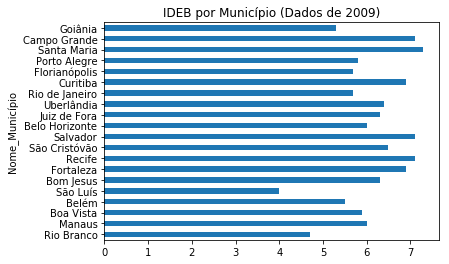

In [91]:
dadosFinais["Valor"].plot(kind='barh')
plt.title("IDEB por Município (Dados de 2009)")

## Comentários sobre a geração dos documentos e do script 

Para converter este notebook para um script Python, use o comando

O arquivo removeextracode.tpl tem o seguinte conteúdo:

## Célula de Inicialização <a id='sobre_inicializacao'></a>

Através da extensão "init_cell" do nbextensions, é possível alterar a ordem de inicialização das células do notebook. Se olharmos os metadados da célula abaixo, veremos que ela está marcada pra ser executada antes de todas as outras células, obtendo-se assim o resultado desejado (esta célula permite que os gráficos da matploblib sejam renderizados dentro do notebook).

In [79]:
%matplotlib inline